In [ ]:
#importing required libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [ ]:
x,y = make_classification(
    n_samples=300,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

In [ ]:
df=pd.DataFrame(x,y)
print(df.head)

<bound method NDFrame.head of            0
0  -1.304123
0  -2.111396
1   0.551629
0  -1.428873
1   1.301392
..       ...
0  -2.306364
1   0.972323
1   1.508887
1  -1.493421
1   1.284281

[300 rows x 1 columns]>


In [ ]:
size=df.shape
print(size)

(300, 1)


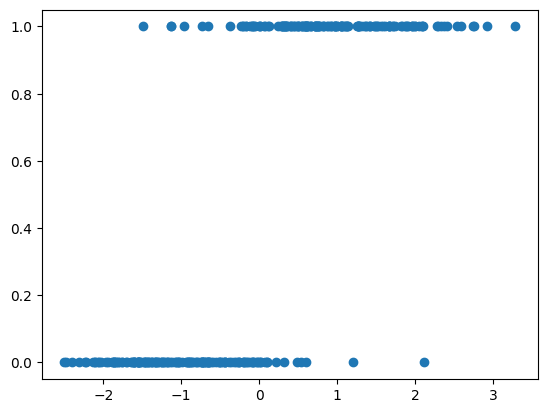

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [ ]:
y_pred=log_reg.predict(x_test)
print(y_pred)

[1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0
 1 1]


In [ ]:
confusion_matrix(y_test, y_pred)

array([[71,  7],
       [ 5, 67]])

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

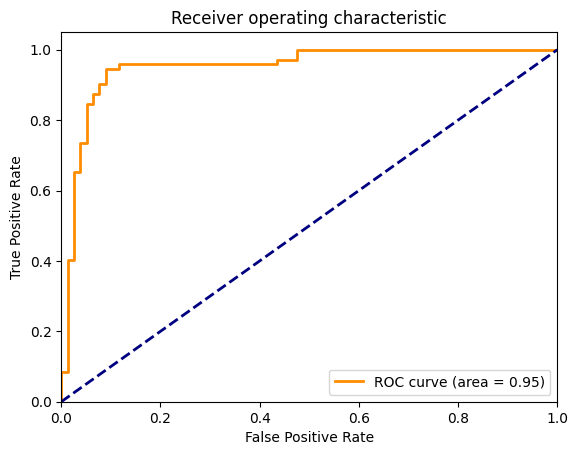

In [ ]:
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()